In [2]:
# Import all necessary Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
# Read csv file and create a dataframe

data = pd.read_csv('/content/Fraud_detection_data.csv')
df = pd.DataFrame(data)
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0


In [9]:
# Since it is huge data, Jupyter Notebook or Google Colab it would take more time on processing the queries.
# So, I used to do the project with 40% of original data
# Same procedure is used for whole data as well.
# Thanks for Understanding

df_sample = df.sample(frac=0.4, random_state=42)
df_sample.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
24683,8,PAYMENT,31549.86,C319409321,543.01,0.00,M148637626,0.0,0.00,0.0,0.0
3638,2,CASH_IN,178961.93,C2006166872,6049254.52,6228216.45,C985934102,1461775.3,1116289.38,0.0,0.0


In [10]:
# Shape of the Sample dataset
df_sample.shape

(11942, 11)

In [17]:
# Drop the Unnecessary Columns
df_sample = df_sample.drop(columns = ["nameOrig","nameDest"])

In [19]:
# Check for null values
df_sample.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
# Check datatypes of all the columns
df_sample.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [23]:
# Check column information
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11942 entries, 24683 to 22469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11942 non-null  int64  
 1   type            11942 non-null  object 
 2   amount          11942 non-null  float64
 3   oldbalanceOrg   11942 non-null  float64
 4   newbalanceOrig  11942 non-null  float64
 5   oldbalanceDest  11942 non-null  float64
 6   newbalanceDest  11942 non-null  float64
 7   isFraud         11942 non-null  float64
 8   isFlaggedFraud  11942 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.2+ MB


In [21]:
# Describe the statistical value of all numerical columns
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,11942.000000,1.194200e+04,1.194200e+04,1.194200e+04,1.194200e+04,1.194200e+04,11942.000000,11942.0
mean,6.585245,1.419915e+05,8.771894e+05,8.947186e+05,8.643773e+05,1.208343e+06,0.002763,0.0
std,2.254934,3.153357e+05,2.497492e+06,2.538499e+06,2.523952e+06,3.116908e+06,0.052497,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,6.078140e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.134661e+04,1.987481e+04,3.968515e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.653881e+05,1.524553e+05,1.576884e+05,3.945020e+05,7.424044e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.820000e+07,2.850000e+07,2.510000e+07,2.880000e+07,1.000000,0.0


In [24]:
# Encoding the categorical variables
le = LabelEncoder()
df_sample['type'] = le.fit_transform(df_sample['type'])

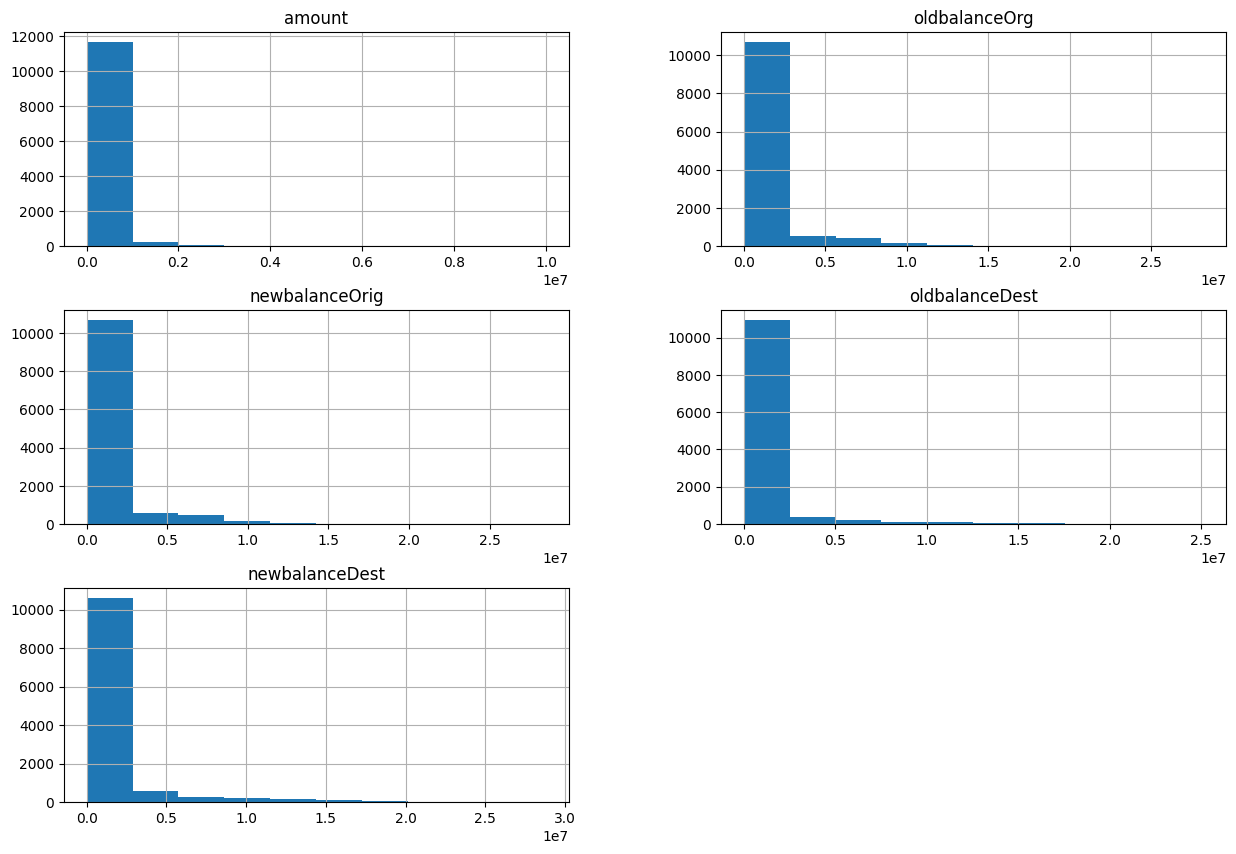

In [32]:
# Using histogram, see the distribution of numerical columns

numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_sample[numeric_features].hist(bins=10, figsize=(15, 10))
plt.show()

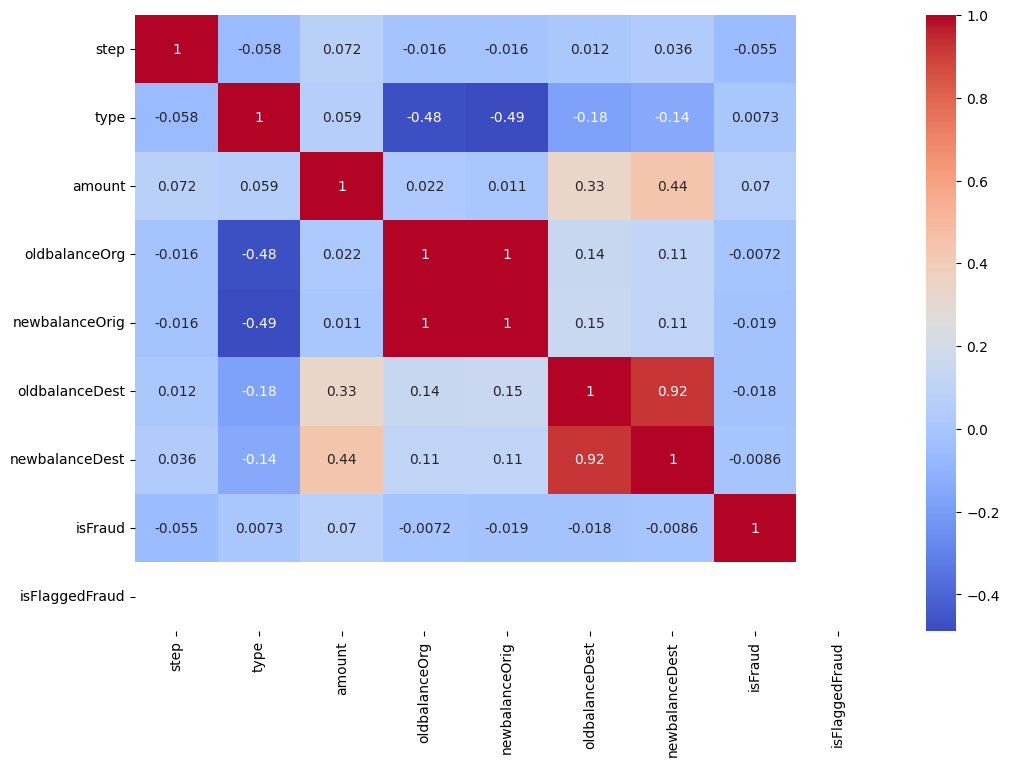

In [25]:
# Calculate correlation and display using heatmap

correlation_matrix = df_sample.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

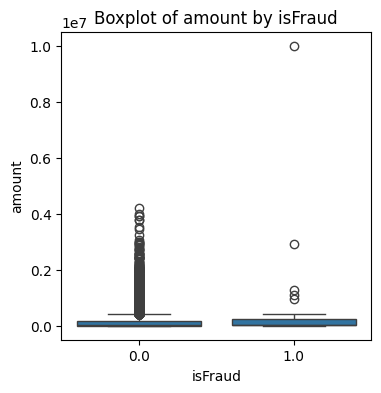

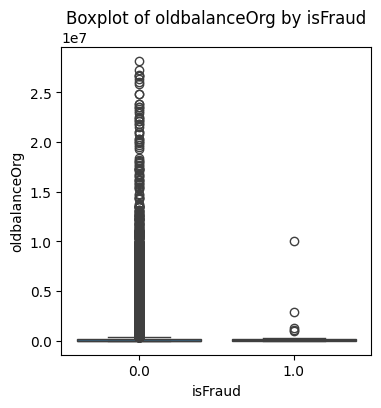

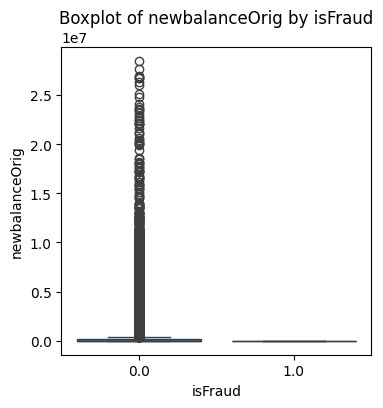

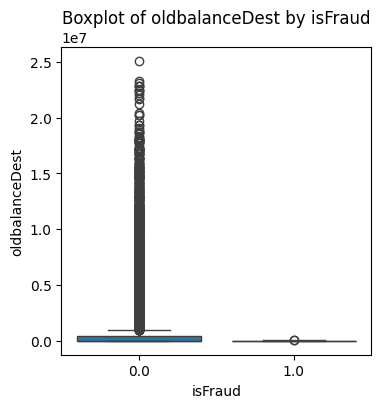

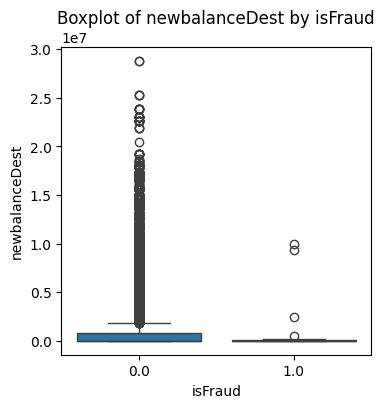

In [31]:
# Compare target variable('isfraud') to all numerical variables using box plot

for feature in numeric_features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='isFraud', y=feature, data=df_sample)
    plt.title(f'Boxplot of {feature} by isFraud')
    plt.show()

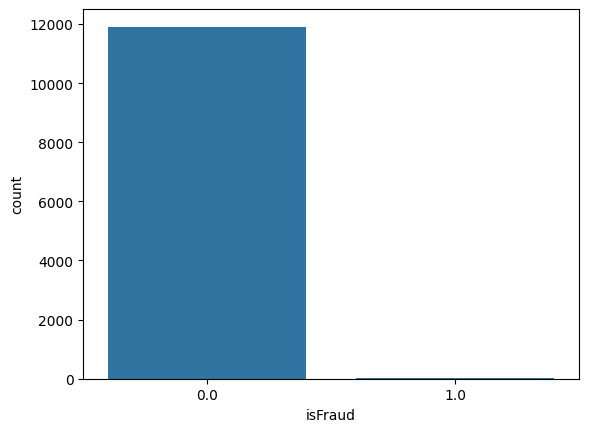

In [34]:
# check the distribution of values in target variables

sns.countplot(x='isFraud', data=df_sample)
plt.show()

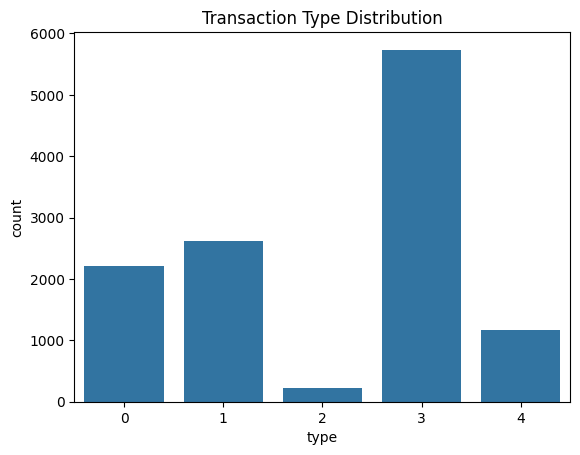

In [33]:
# Distribution of transaction type value using Count plot

sns.countplot(x='type', data=df_sample)
plt.title('Transaction Type Distribution')
plt.show()

In [35]:
# Define test and train data and split them using train_test_split Function

X = df_sample.drop(['isFraud'], axis=1)
y = df_sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)

X_train shape (9553, 8)
X_test shape (2389, 8)


In [37]:
# Deploy Random Forest Classifier Algorithm, apply training data and get the predicted result using test data.
# Provide Accuracy, Classification Report, Confusion Matrix

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9958141481791545
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2379
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00      2389
   macro avg       0.50      0.50      0.50      2389
weighted avg       0.99      1.00      0.99      2389

Confusion Matrix:
 [[2379    0]
 [  10    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [39]:
# Print the best parameters and score

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9984298454596372


In [41]:
# Use the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions using best estimator
y_pred_best = best_rf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print('Classification Report:\n', classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

Accuracy: 0.9958141481791545
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2379
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00      2389
   macro avg       0.50      0.50      0.50      2389
weighted avg       0.99      1.00      0.99      2389

Confusion Matrix:
 [[2379    0]
 [  10    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# The Factors affecting the classifier result.

importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Top features:\n", feature_importances.head(10))


Top features:
           Feature  Importance
6  newbalanceDest    0.230013
2          amount    0.224612
5  oldbalanceDest    0.175904
3   oldbalanceOrg    0.172059
0            step    0.102015
1            type    0.074382
4  newbalanceOrig    0.021015
7  isFlaggedFraud    0.000000
